In [1]:
# importa as libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from   sklearn.linear_model import LinearRegression
from   sklearn.metrics import r2_score
import statsmodels.api as sm
import os

## carregar o ficheiro Insol para um dataframe do pandas dInsol
## load the Insol file into a pandas dInsol dataframe
df = pd.read_csv('../Fraud/dataset/registration_data_20K_full.csv',sep=',',header=0)
i = 0
for d in df['ip_address']:
    d = (d.split(".",1))
    #print(d[0])
    df.loc[i, 'ip_address'] = d[0]
    i = i+1
j=0
for d in df['email_address']:
    d = (d.split("@",1))
    #print(d[1])
    if(d[1] == "example.net"):
        df.loc[j, 'email_address'] = 0
    elif(d[1] == "example.org"):
        df.loc[j, 'email_address'] = 1
    elif(d[1] == "example.com"):
        df.loc[j, 'email_address'] = 2
    j = j + 1
z=0
for d in df['billing_address']:
    d = (d.split(" ",1))
    #print(d[0])
    df.loc[z, 'billing_address'] = d[0]
    z = z + 1
df = df.drop('billing_state', axis=1)
df = df.drop('user_agent', axis=1)
df = df.drop('phone_number', axis=1)
df = df.drop('EVENT_TIMESTAMP', axis=1)
df["EVENT_LABEL"]= df["EVENT_LABEL"].map({"legit": 1,"fraud": 0})
 
df.head(50)     #Mostra as primeiras n linhas do conjunto de dados
#df.tail(5)     #Mostra as últimas n linhas do conjunto de dados

,ip_address,email_address,billing_postal,billing_address,EVENT_LABEL
0,112,0,34491,12351,1
1,192,0,34555,691,1
2,185,0,33611,28583,1
3,68,0,33520,019,1
4,117,2,33889,1023,1
5,94,1,34362,520,1
6,33,2,34421,30898,1
7,204,0,33605,8307,1
8,49,2,33918,284,1
9,42,2,34603,0793,1


O modelo é: Maneio = 136.17 + -0.00069703X


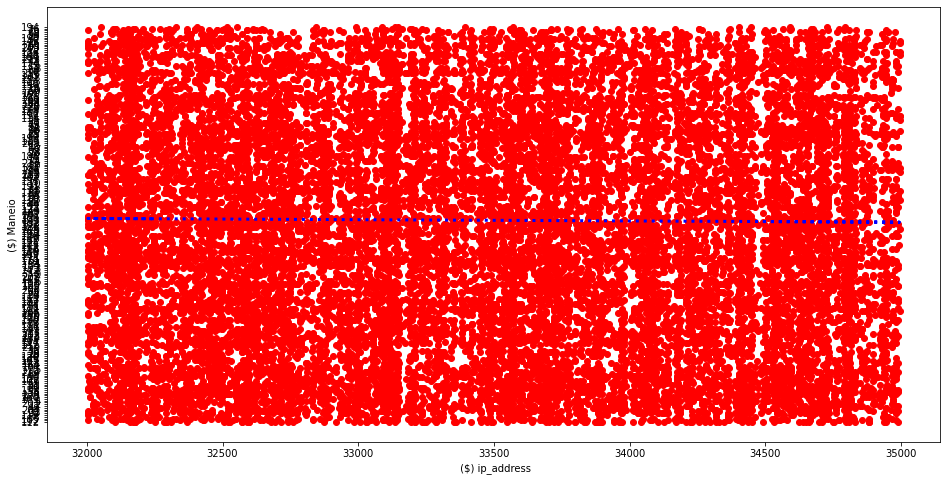

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [2]:

X = df['billing_postal'].values.reshape(-1,1)
y = df['ip_address'].values.reshape(-1,1)


reg = LinearRegression()
reg.fit(X, y)

print("O modelo é: Maneio = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
f_previsaoes = reg.predict(X)

plt.figure(figsize = (16,8))
plt.scatter(
    df['billing_postal'], 
    df['ip_address'], 
    c='red')
plt.plot(
    df['billing_postal'],
    f_previsaoes,
    c='blue',
    linewidth=3,
    linestyle=':'
)

plt.xlabel(" ($) ip_address")
plt.ylabel(" ($) Maneio ")
plt.show()

X = df['billing_postal']
y = df['ip_address']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2.astype(float))
est2 = est.fit()
print(est2.summary())

